# Supervised Learning Final Project
## Project Topic: Predicting if Wine Quality is Above Average Using Supervised Learning Models
The goal of this project is to predict if the quality of wine is above average based on various chemical properties using supervised learning models. The project focuses on using a binary classification approach to model the relationship between wine characteristics and quality.
This project will involve a comprehensive exploration of the data, followed by modeling and evaluation using multiple supervised learning algorithms, including:
- Logistic Regression
- Decision Tree Classifier
- Random Forest Classifier
- Support Vector Classifier

Hyperparameter tuning will be applied to optimize model performance, and the models will be evaluated using metrics such as accuracy, precision, recall, and F1-score. For the binary classification, we will also analyze the Receiver Operating Characteristic (ROC) curves and the Area Under the Curve (AUC) to evaluate the performance of each model.

Project Repo:
https://github.com/MFranco2000/Supervised-Learning-Final-Project-Predicting-Wine

In [2]:
import scipy as sp
import scipy.stats as stats
import seaborn as sns
import copy
sns.set()
import statsmodels.formula.api as smf
import statsmodels.api as sm
###
from math import exp
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
###
import math
import pickle
import gzip
import sklearn
from sklearn.tree import DecisionTreeClassifier
###
from sklearn.base import clone 
from sklearn import tree
###
from sklearn.svm import LinearSVC
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve, auc

# Data
The dataset used in this project is the Wine Quality dataset, which consists of 1,599 red wine samples, 4898 white wine samples, and 11 chemical features. The target variable is the wine quality score (on a scale from 1 to 10), determined by sensory experts. The dataset is publicly available on the UCI Machine Learning Repository. Here is the citation:
- Cortez, P., Cerdeira, A., Almeida, F., Matos, T., & Reis, J. (2009). Wine Quality [Dataset]. UCI Machine Learning Repository. https://doi.org/10.24432/C56S3T.

The dataset includes 3 files: one csv for red, one csv for white, and a file containing wine names. This project only needs the red and white wine csvs which are read as a dataframe below.

This data is already cleaned.

In [4]:
red = pd.read_csv('winequality-red.csv', delimiter=';')

white = pd.read_csv('winequality-white.csv', delimiter=';')

print('red wine')
display(red)
print('white wine') 
display(white)

red wine


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


white wine


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


### Data Description
The red wine data contains 1599 rows and 12 columns. The white wine data contains 4898 rows and 12 columns. 
The 12 columns/features are:
- Fixed Acidity (Numeric): The amount of fixed acids in the wine
- Volatile Acidity (Numeric): The amount of volatile acids
- Citric Acid (Numeric): The amount of citric acid in the wine
- Residual Sugar (Numeric): The amount of sugar remaining after fermentation stops
- Chlorides (Numeric): The amount of salt in the wine
- Free Sulfur Dioxide (Numeric): The free form of sulfur dioxide in wine
- Total Sulfur Dioxide (Numeric): The total amount of sulfur dioxide (free and bound forms)
- Density (Numeric): The density of wine (varies based on sugar content)
- pH (Numeric): The acidity of the wine
- Sulphates (Numeric): The amount of sulfates in the wine
- Alcohol (Numeric): The percentage of alcohol content
- Quality (Categorical): Represents the perceived quality of the wine, as judged by experts. A higher value means better quality

### Data Cleaning and Preprocessing
The data is already cleaned, so there are no missing values. 

I will be adding an 'isRed' feature in order to differentiate between the two types of wine.

In [9]:
red.insert(0,'isRed', [True]*len(red['quality']) , True)
white.insert(0,'isRed', [False]*len(white['quality']) , True)
allWine = pd.concat([red, white])
display(allWine)

,isRed,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,True,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,True,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,True,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,True,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,True,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4893,False,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,False,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,False,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,False,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


# Exploratory Data Analysis

With the dataset loaded and combined, below I am inspecting the structure of the dataset, checking for any missing values or anomalies in the data. I also generate some initial descriptive statistics to understand the distributions and ranges of the features.

Below, I am just checking how many counts of each score there are to see if there is anything out of the ordinary

[0, 0, 10, 53, 681, 638, 199, 18, 0, 0]


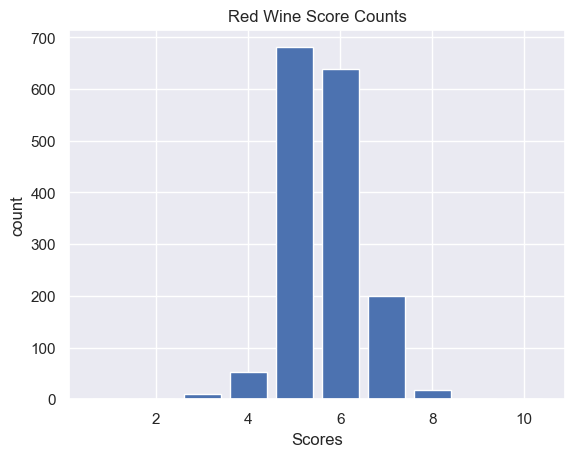

[0, 0, 20, 163, 1457, 2198, 880, 175, 5, 0]


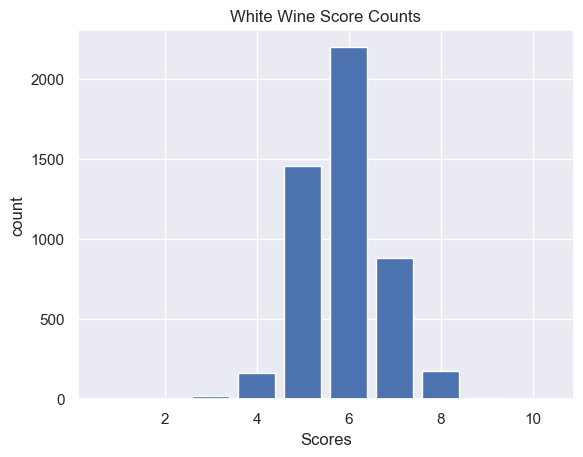

[0, 0, 30, 216, 2138, 2836, 1079, 193, 5, 0]


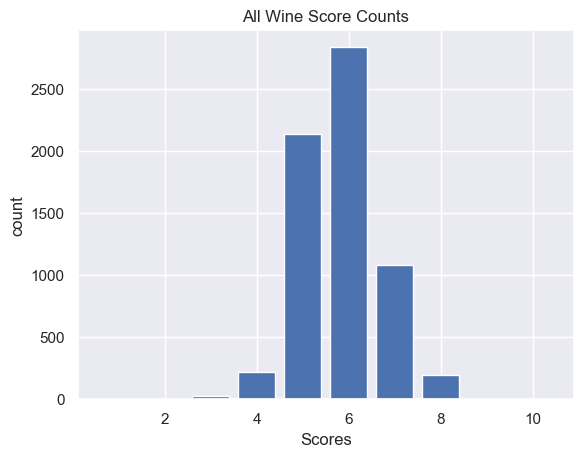

In [13]:
redScores = [0] * 10
for i in (red['quality']):
    redScores[i-1] = redScores[i-1] + 1

whiteScores = [0] * 10
for i in (white['quality']):
    whiteScores[i-1] = whiteScores[i-1] + 1

allWineScores = [0] * 10
for i in (allWine['quality']):
    allWineScores[i-1] = allWineScores[i-1] + 1

scores = [1,2,3,4,5,6,7,8,9,10]

print(redScores)
plt.figure()
plt.bar(scores, redScores)
plt.xlabel('Scores')
plt.ylabel('count')
plt.title('Red Wine Score Counts')
plt.show()

print(whiteScores)
plt.figure()
plt.bar(scores,whiteScores)
plt.xlabel('Scores')
plt.ylabel('count')
plt.title('White Wine Score Counts')
plt.show()

print(allWineScores)
plt.figure()
plt.bar(scores, allWineScores)
plt.xlabel('Scores')
plt.ylabel('count')
plt.title('All Wine Score Counts')
plt.show()

Everything seems to be fine with the scores. If anything, red wine seems to score 5 more than white wine does, and red wine's maximum most score count is 5 while white wine's max score count is 6.

Below I am plotting the features vs the quality to see if anything stands out.

fixed acidity


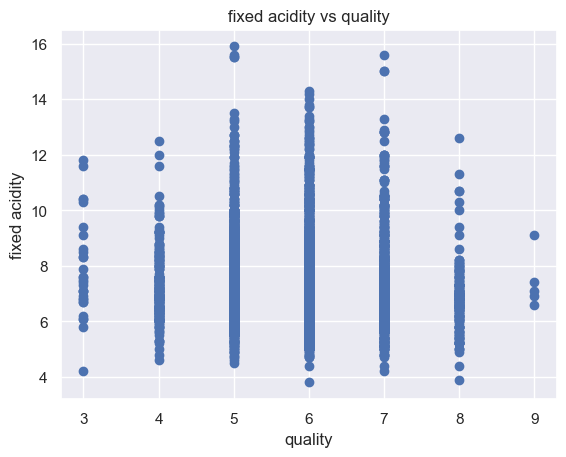

volatile acidity


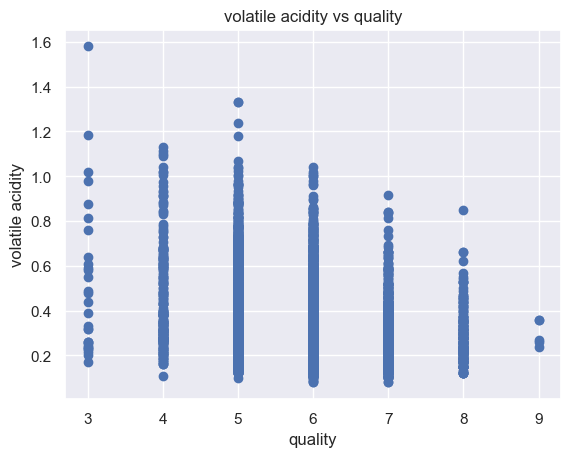

citric acid


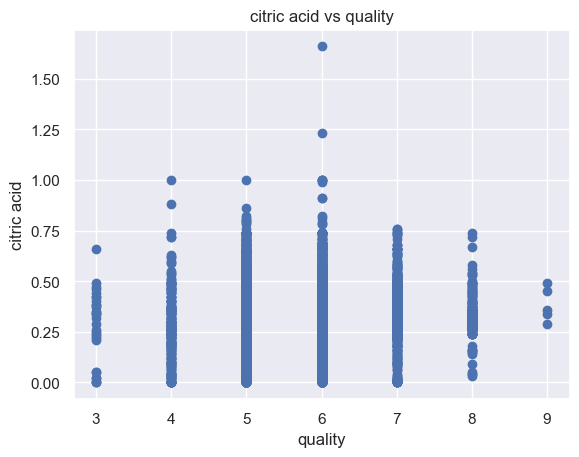

residual sugar


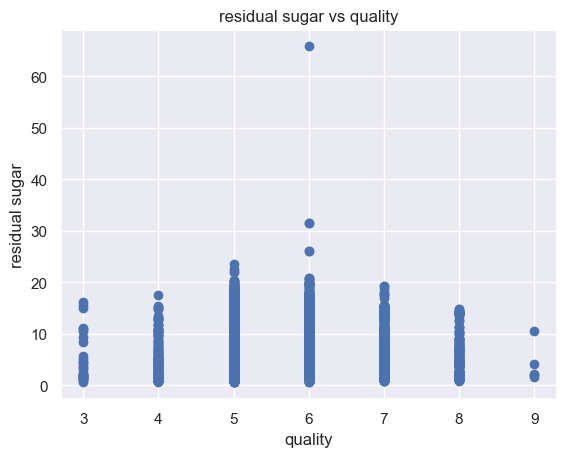

chlorides


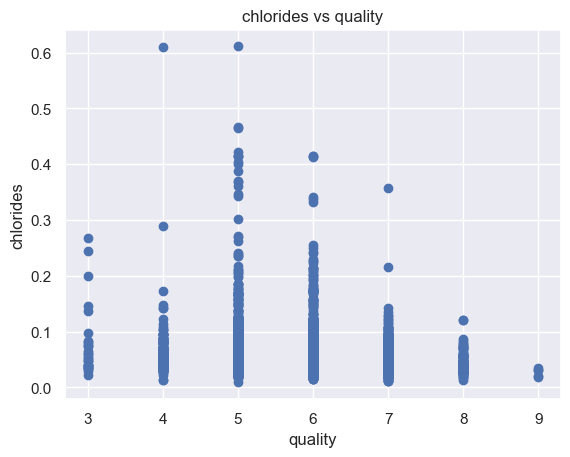

free sulfur dioxide


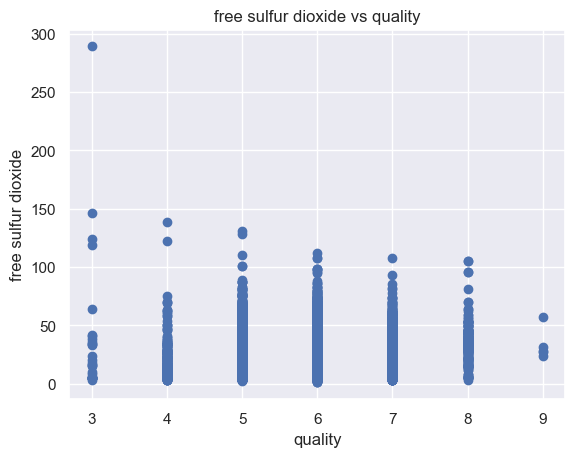

total sulfur dioxide


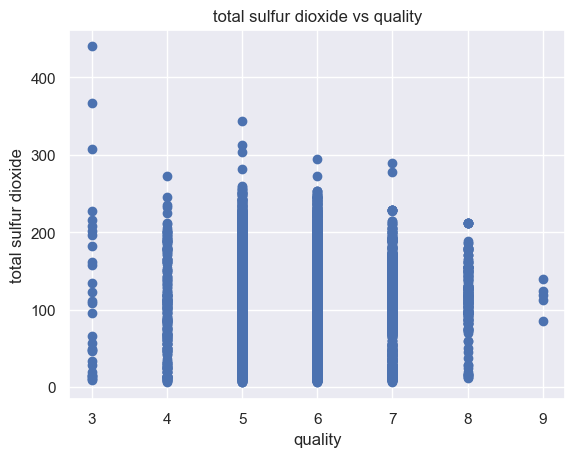

density


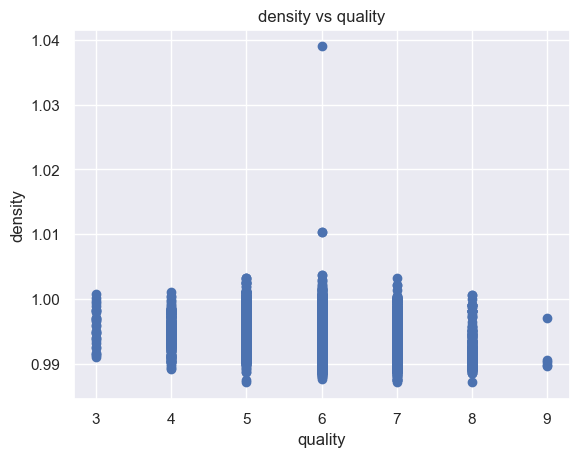

pH


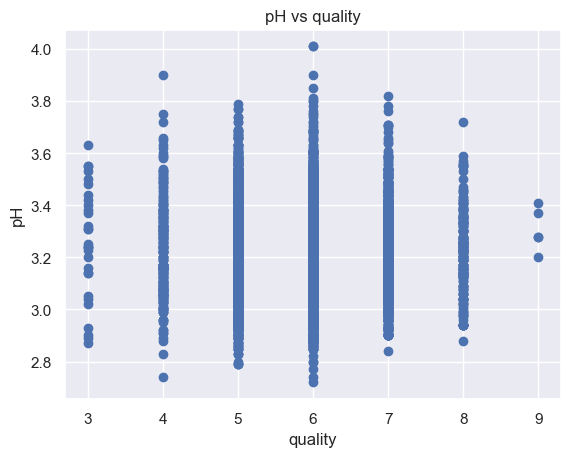

sulphates


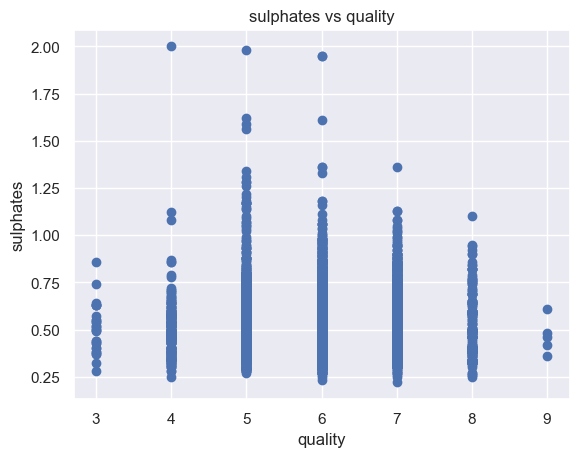

alcohol


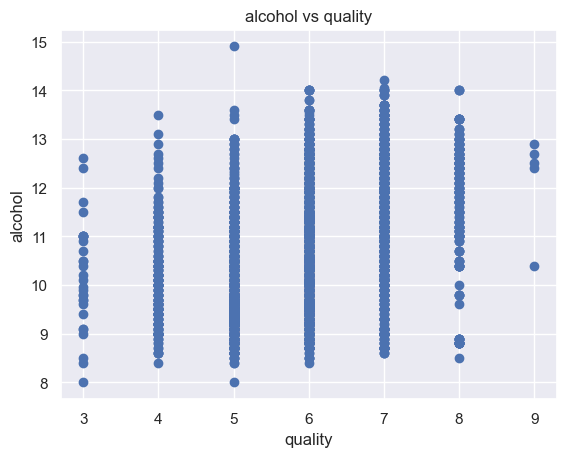

In [16]:
for feature in allWine.columns:
    if feature == 'quality' or feature == 'isRed':
        continue
    print(feature)
    plt.figure()
    plt.scatter(allWine['quality'], allWine[feature])
    plt.ylabel(feature)
    plt.xlabel('quality')
    plt.title(f'{feature} vs quality')
    plt.show()

Something that stands out here are the sugar, density, and both sulphates related plots. These plots have one or two points that are well beyond the rest of the values. However, these belong to just two wines and the pairs (sugar + density) and (sulphates + total sulphates) are causations. These two wines do have these features and are not an error in the data.

Below are some descriptive statistics 

In [19]:
print(allWine.describe())

       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    6497.000000       6497.000000  6497.000000     6497.000000   
mean        7.215307          0.339666     0.318633        5.443235   
std         1.296434          0.164636     0.145318        4.757804   
min         3.800000          0.080000     0.000000        0.600000   
25%         6.400000          0.230000     0.250000        1.800000   
50%         7.000000          0.290000     0.310000        3.000000   
75%         7.700000          0.400000     0.390000        8.100000   
max        15.900000          1.580000     1.660000       65.800000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  6497.000000          6497.000000           6497.000000  6497.000000   
mean      0.056034            30.525319            115.744574     0.994697   
std       0.035034            17.749400             56.521855     0.002999   
min       0.009000             1.000000         

Below, I am visualizing the distribution of wine quality, visualizing the distribution of features using histograms, and checking for corelations using a heatmap and a pair plot.

Text(0.5, 1.0, 'Wine Quality Distribution')

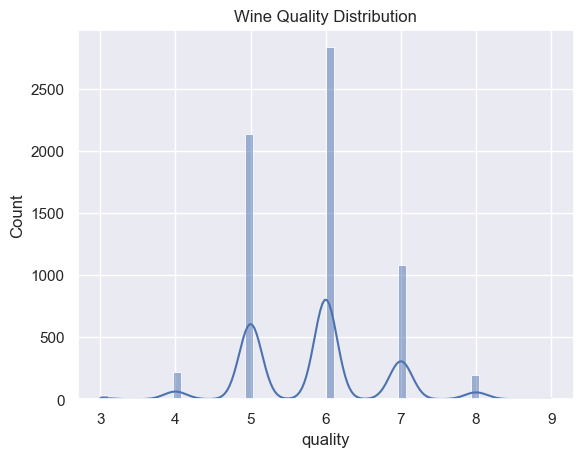

In [22]:
sns.histplot(allWine['quality'], kde=True)
plt.title('Wine Quality Distribution')

Text(0.5, 0.98, 'Feature Distributions')

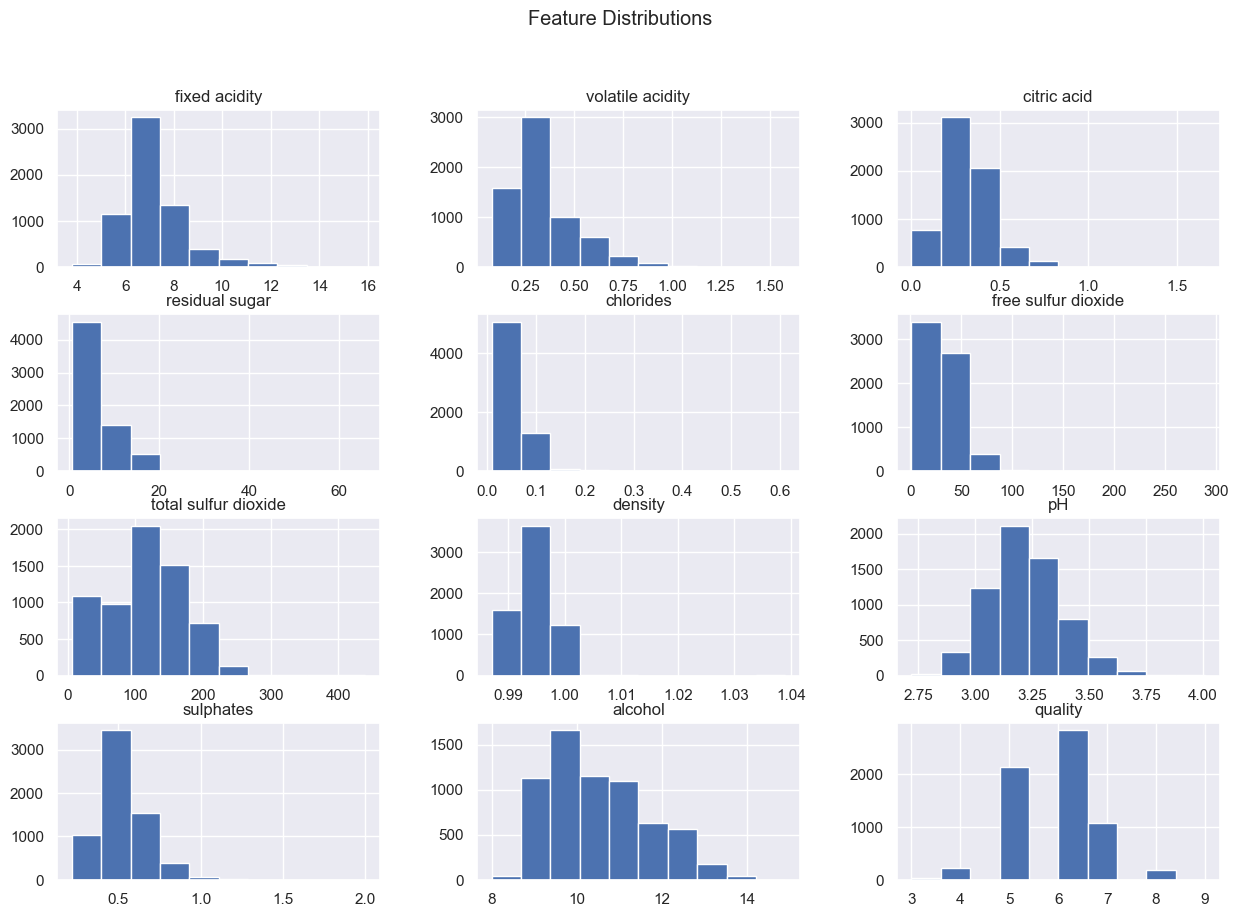

In [24]:
allWine.hist(figsize=(15,10))
plt.suptitle('Feature Distributions')

In [25]:
corr = allWine.corr()

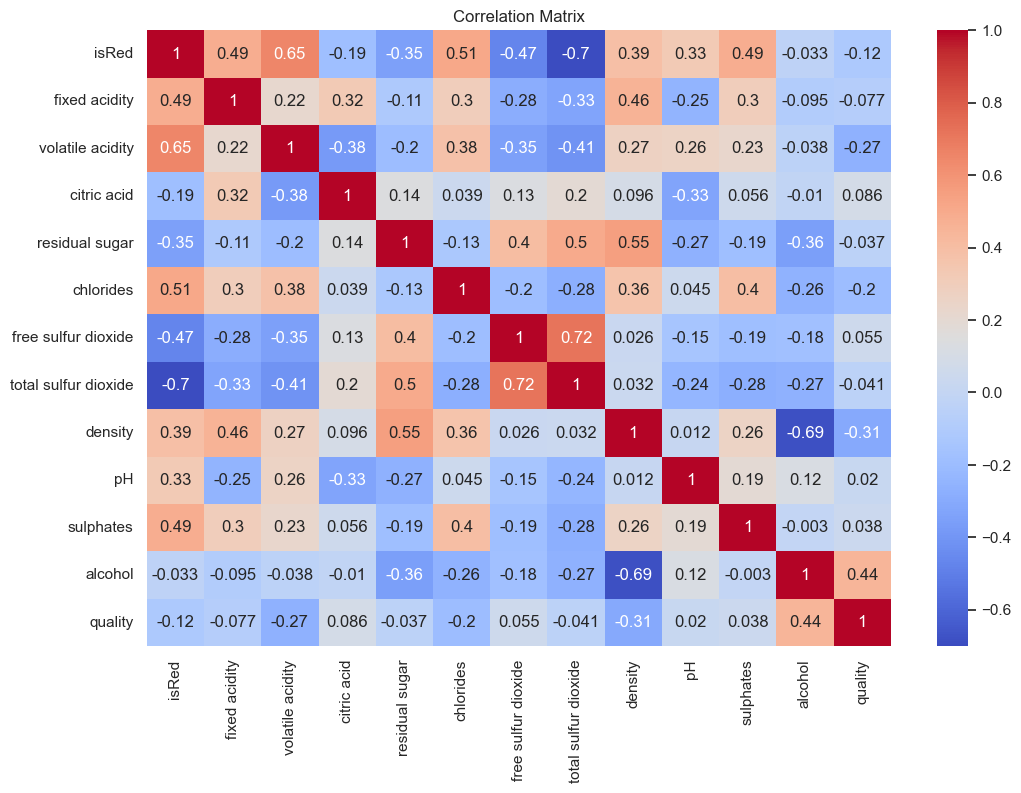

In [28]:
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

C:\Users\mfran\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Text(0.5, 1.0, 'Pair Plot')

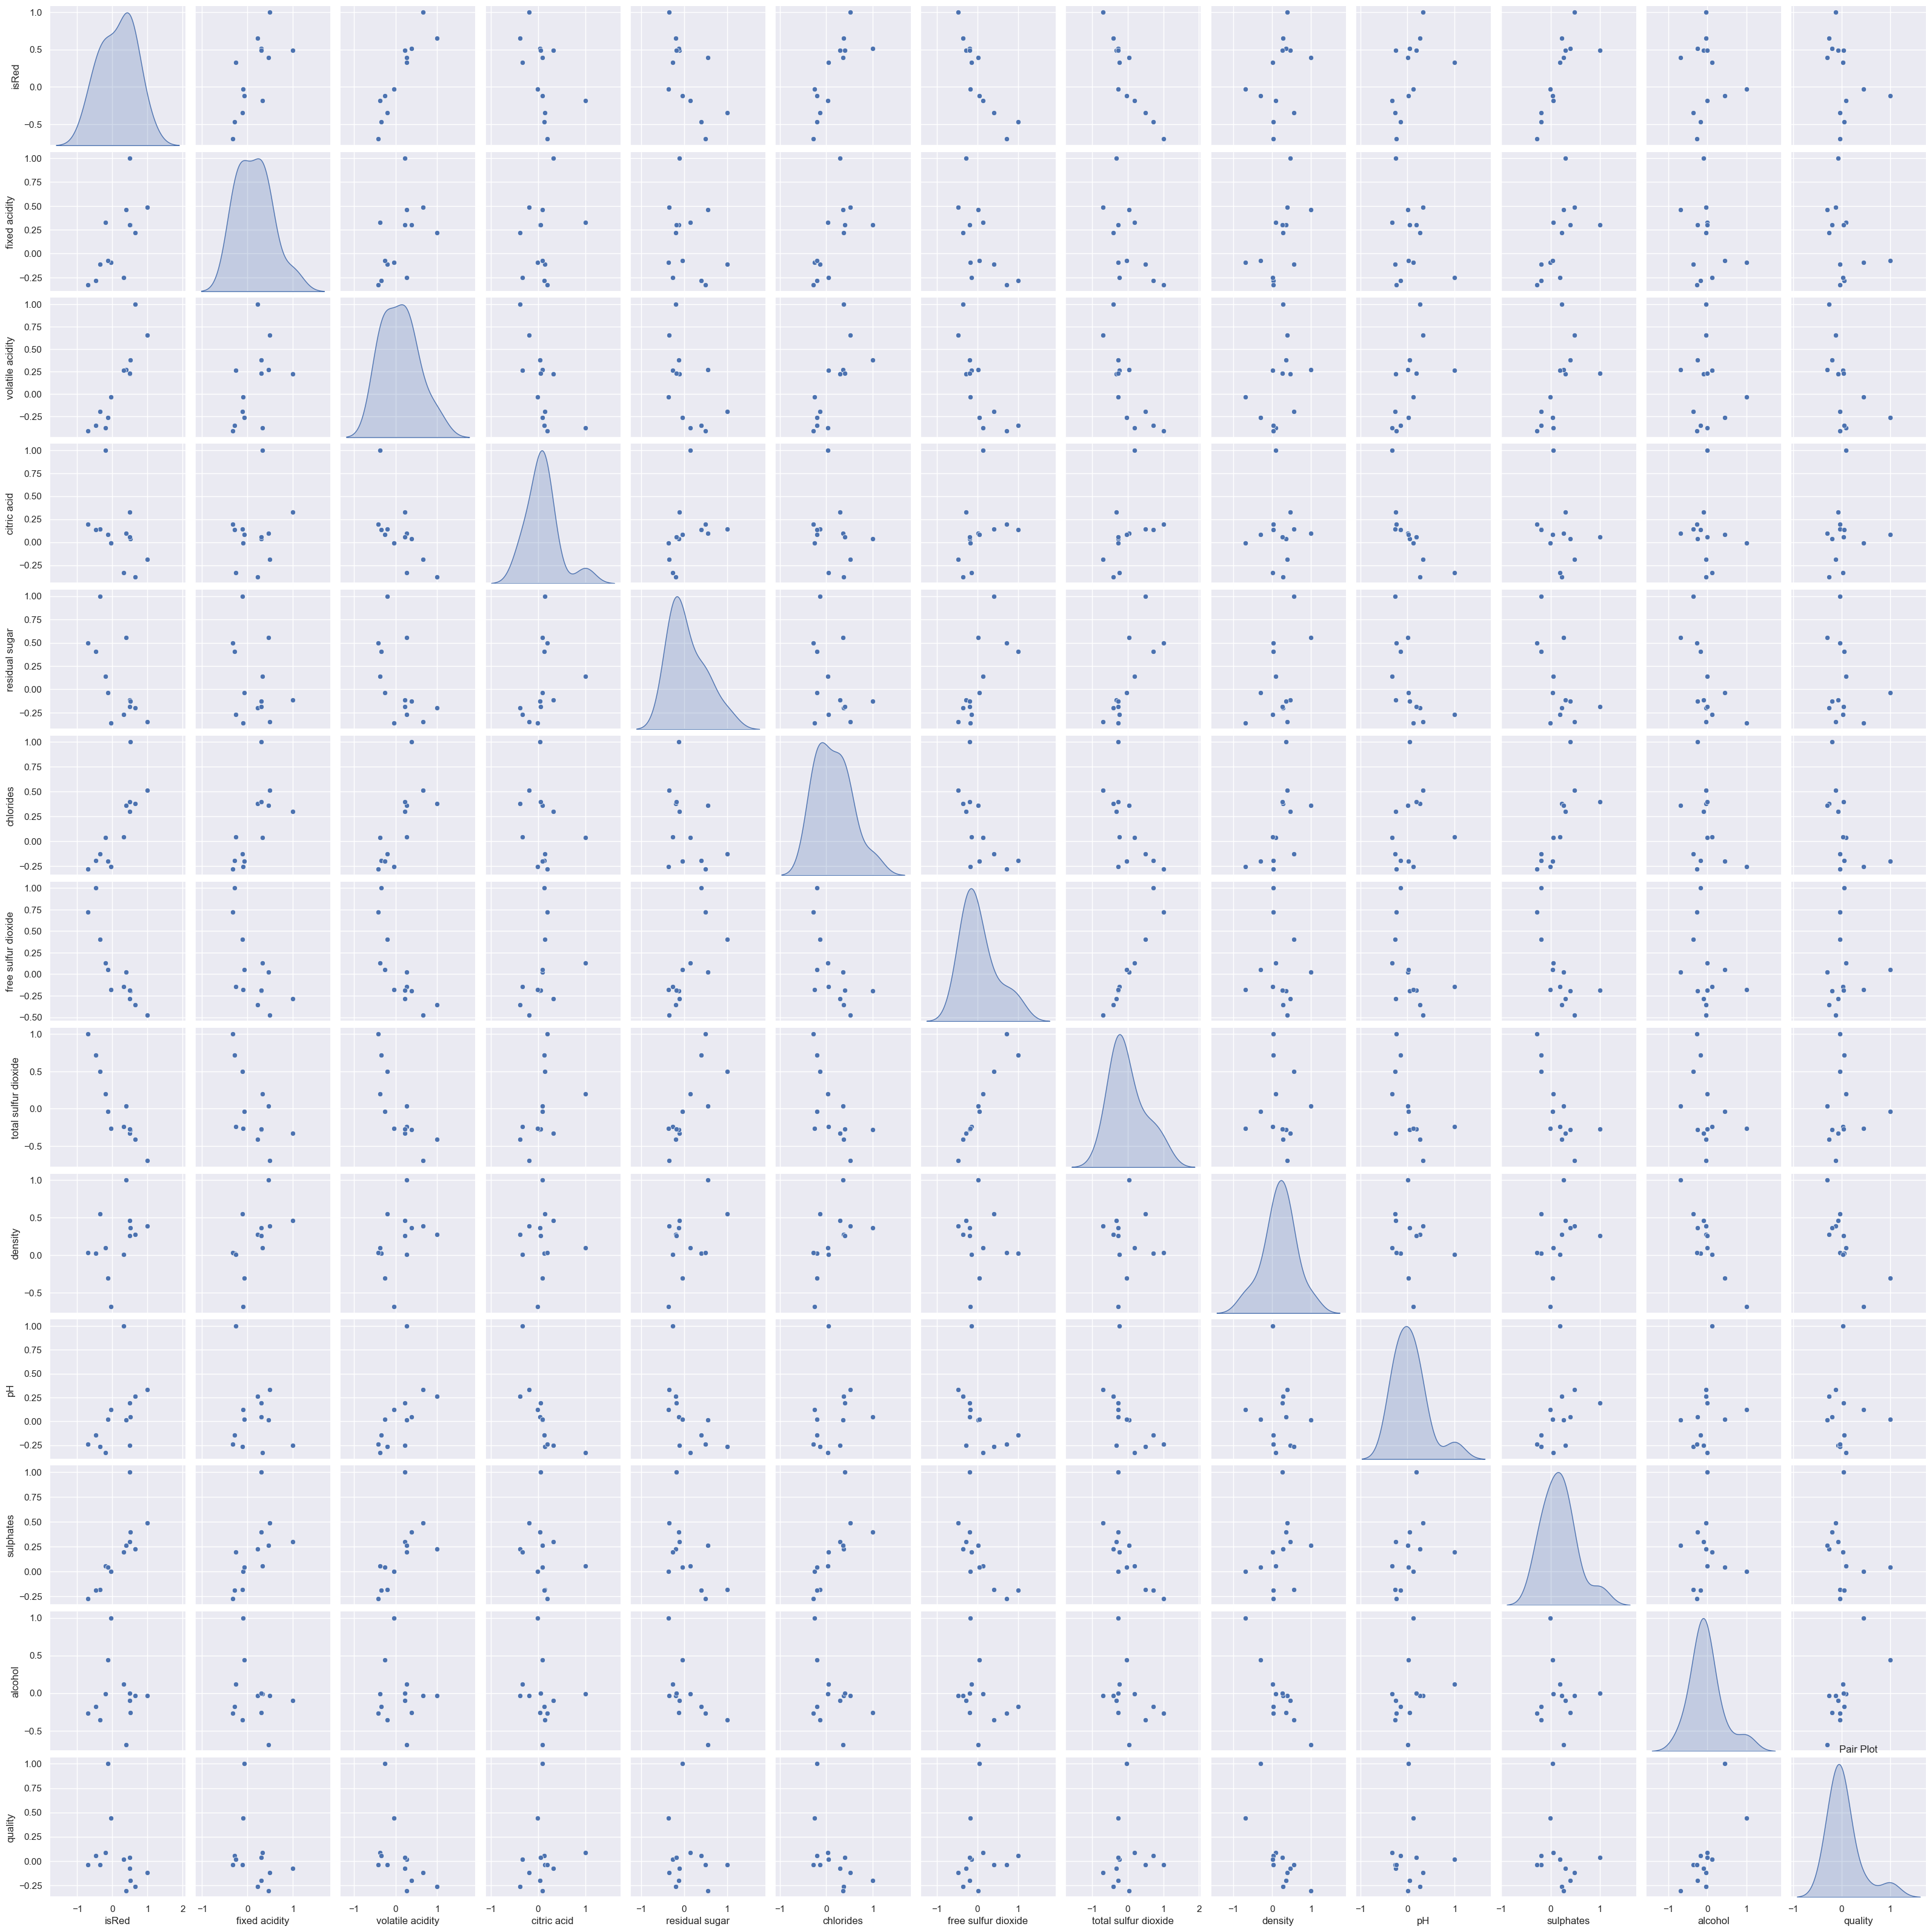

In [29]:
sns.pairplot(corr, diag_kind='kde')
plt.title('Pair Plot')

From the distributions, nothing looks unusual. On the heatmap and pairplot, alcohol seems to have some correlation with the quality.

Since my objective with this project is to see if a model can predict if the quality of a wine is average or above when just given the features, below is the creation of a new dataset that is exactly the same as the last one, however quality is given a True of False values if the quality is average or above.

In [33]:
avg_qual = allWine['quality'].mean()
print(avg_qual)
avg_quality = round(avg_qual)
print(avg_quality)

5.818377712790519
6


In [35]:
wine_avg_quality = allWine.copy()
wine_avg_quality['quality'] = wine_avg_quality['quality'].apply(lambda x: True if x >= avg_qual else False)
display(wine_avg_quality)

,isRed,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,True,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,False
1,True,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,False
2,True,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,False
3,True,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,True
4,True,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4893,False,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,True
4894,False,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,False
4895,False,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,True
4896,False,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,True


Below, I have the same visualizations as above however this uses the new dataset, mostly to see if anything has changed or if something new stands out.

fixed acidity


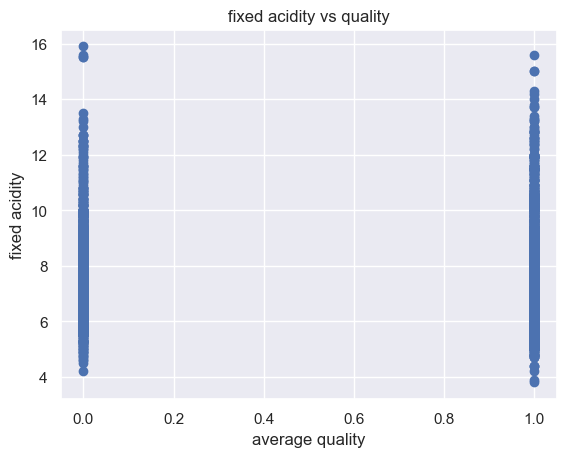

volatile acidity


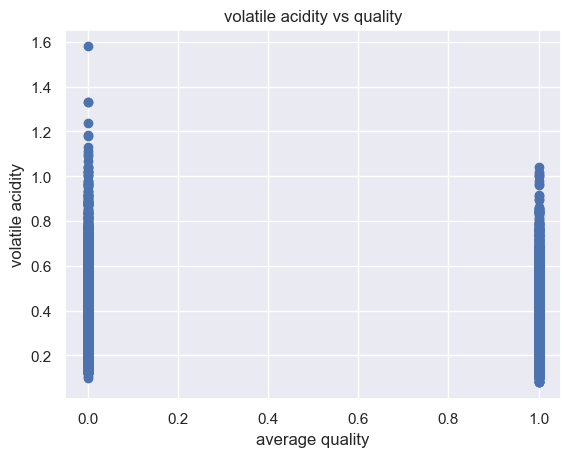

citric acid


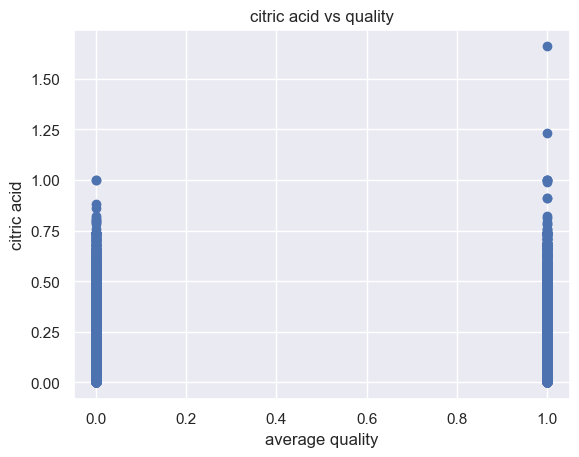

residual sugar


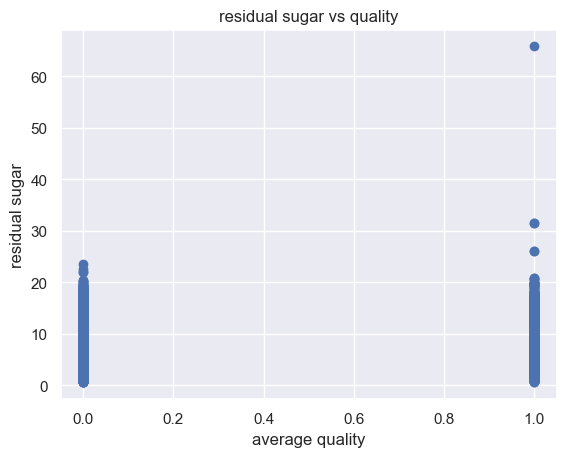

chlorides


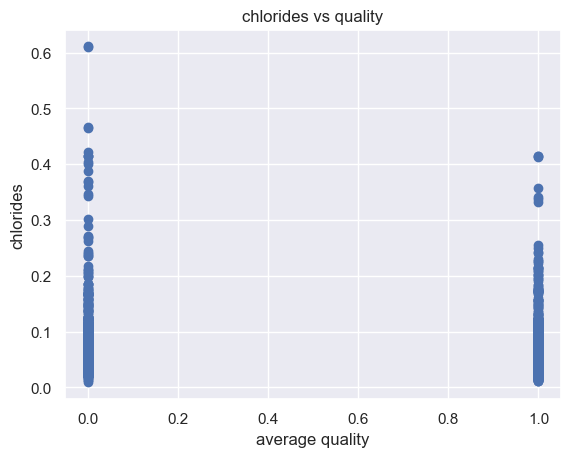

free sulfur dioxide


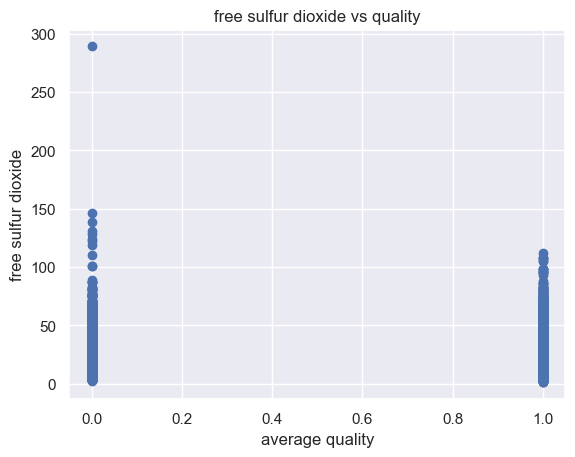

total sulfur dioxide


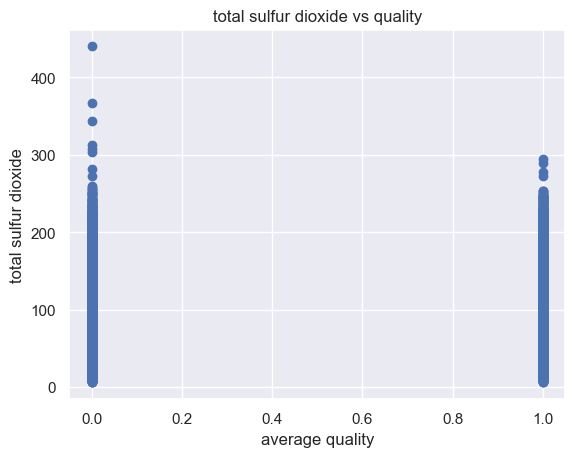

density


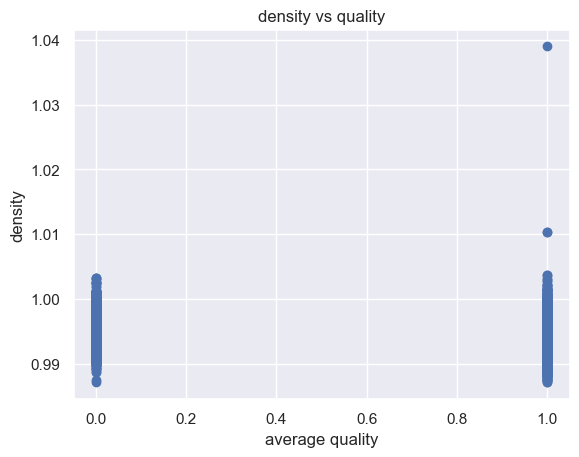

pH


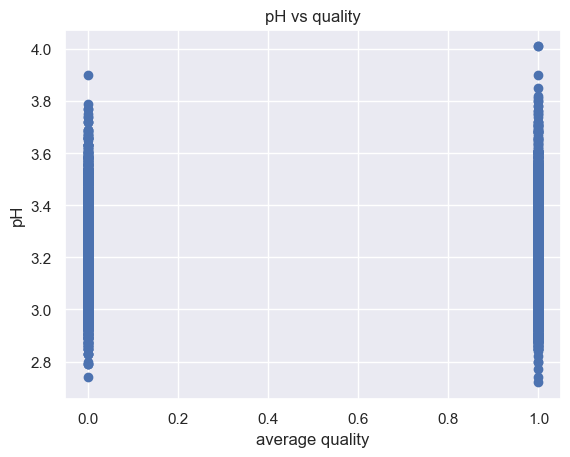

sulphates


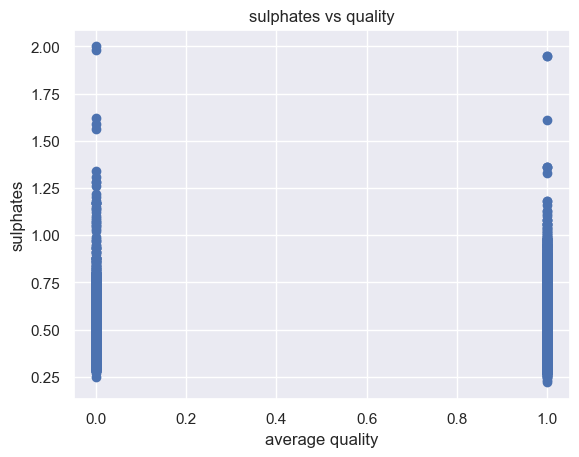

alcohol


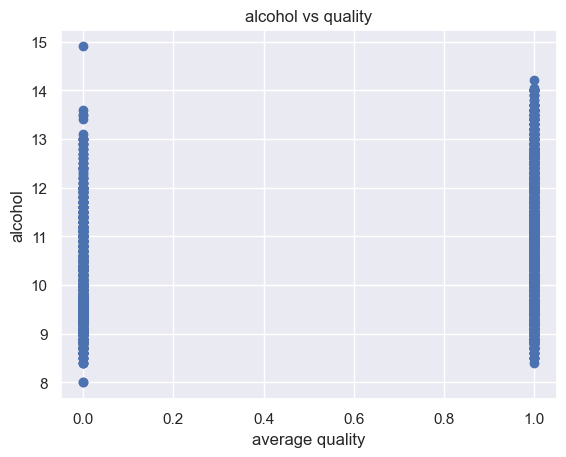

In [38]:
for feature in wine_avg_quality.columns:
    if feature == 'quality' or feature == 'isRed':
        continue
    print(feature)
    plt.figure()
    plt.scatter( wine_avg_quality['quality'], wine_avg_quality[feature])
    plt.ylabel(feature)
    plt.xlabel('average quality')
    plt.title(f'{feature} vs quality')
    plt.show()

In [39]:
print(wine_avg_quality.describe())

       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    6497.000000       6497.000000  6497.000000     6497.000000   
mean        7.215307          0.339666     0.318633        5.443235   
std         1.296434          0.164636     0.145318        4.757804   
min         3.800000          0.080000     0.000000        0.600000   
25%         6.400000          0.230000     0.250000        1.800000   
50%         7.000000          0.290000     0.310000        3.000000   
75%         7.700000          0.400000     0.390000        8.100000   
max        15.900000          1.580000     1.660000       65.800000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  6497.000000          6497.000000           6497.000000  6497.000000   
mean      0.056034            30.525319            115.744574     0.994697   
std       0.035034            17.749400             56.521855     0.002999   
min       0.009000             1.000000         

<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


Text(0.5, 1.0, 'Wine Quality Distribution')

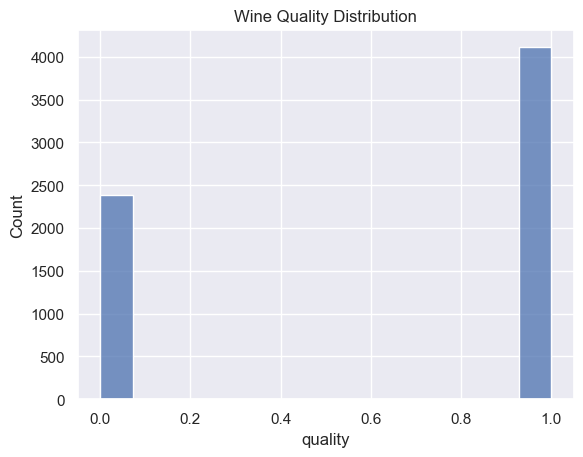

In [42]:
sns.histplot(wine_avg_quality['quality'])
plt.title('Wine Quality Distribution')

Text(0.5, 0.98, 'Feature Distributions')

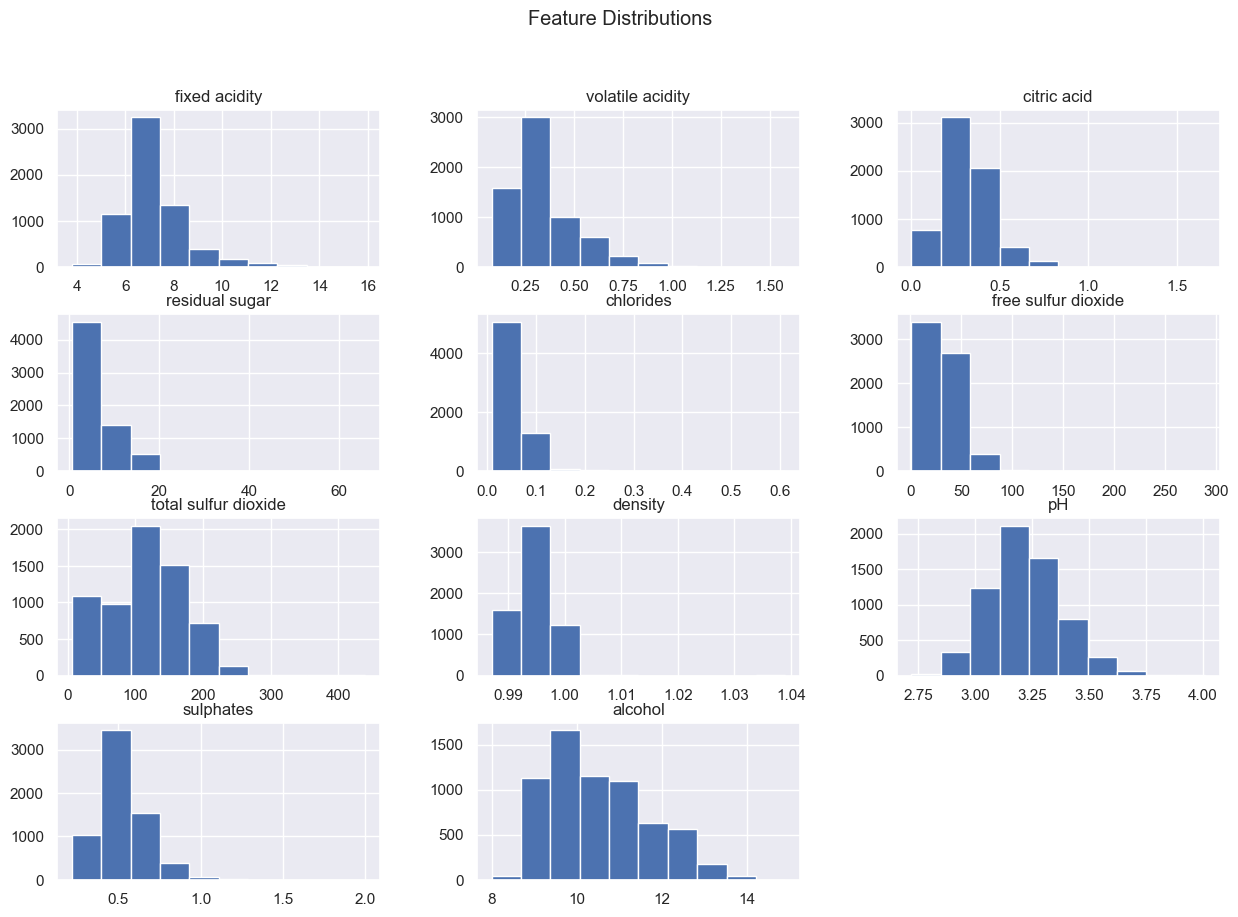

In [44]:
wine_avg_quality.hist(figsize=(15,10))
plt.suptitle('Feature Distributions')

In [45]:
corr = wine_avg_quality.corr()

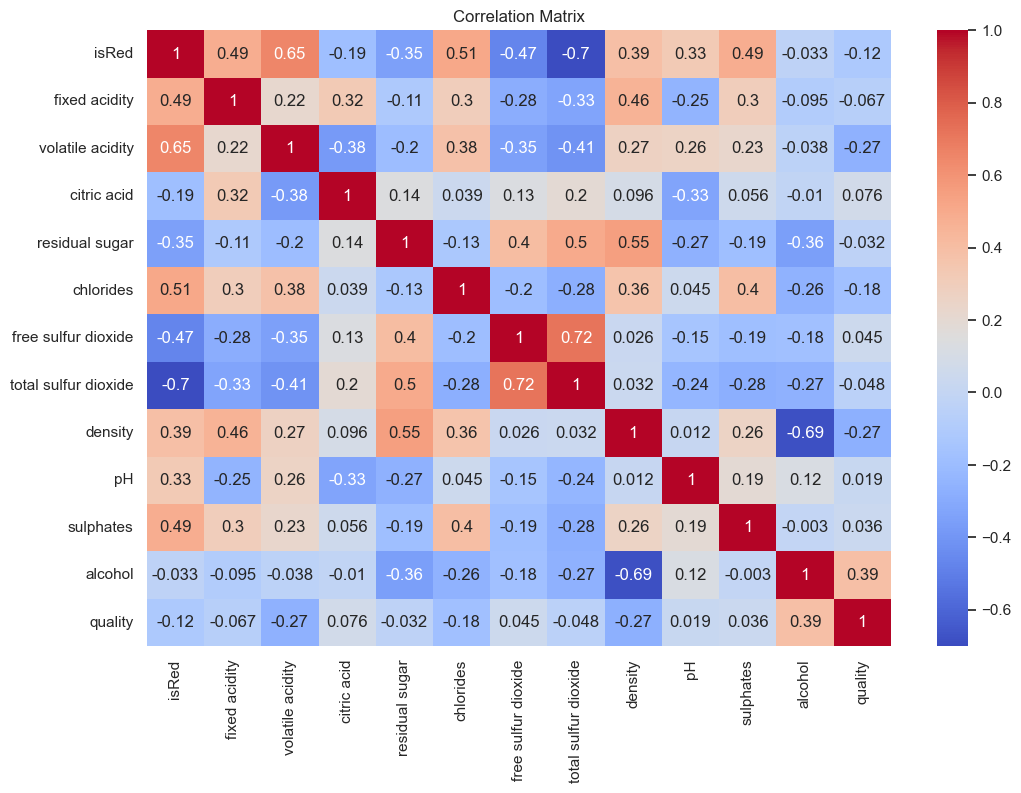

In [46]:
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

C:\Users\mfran\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Text(0.5, 1.0, 'Pair Plot')

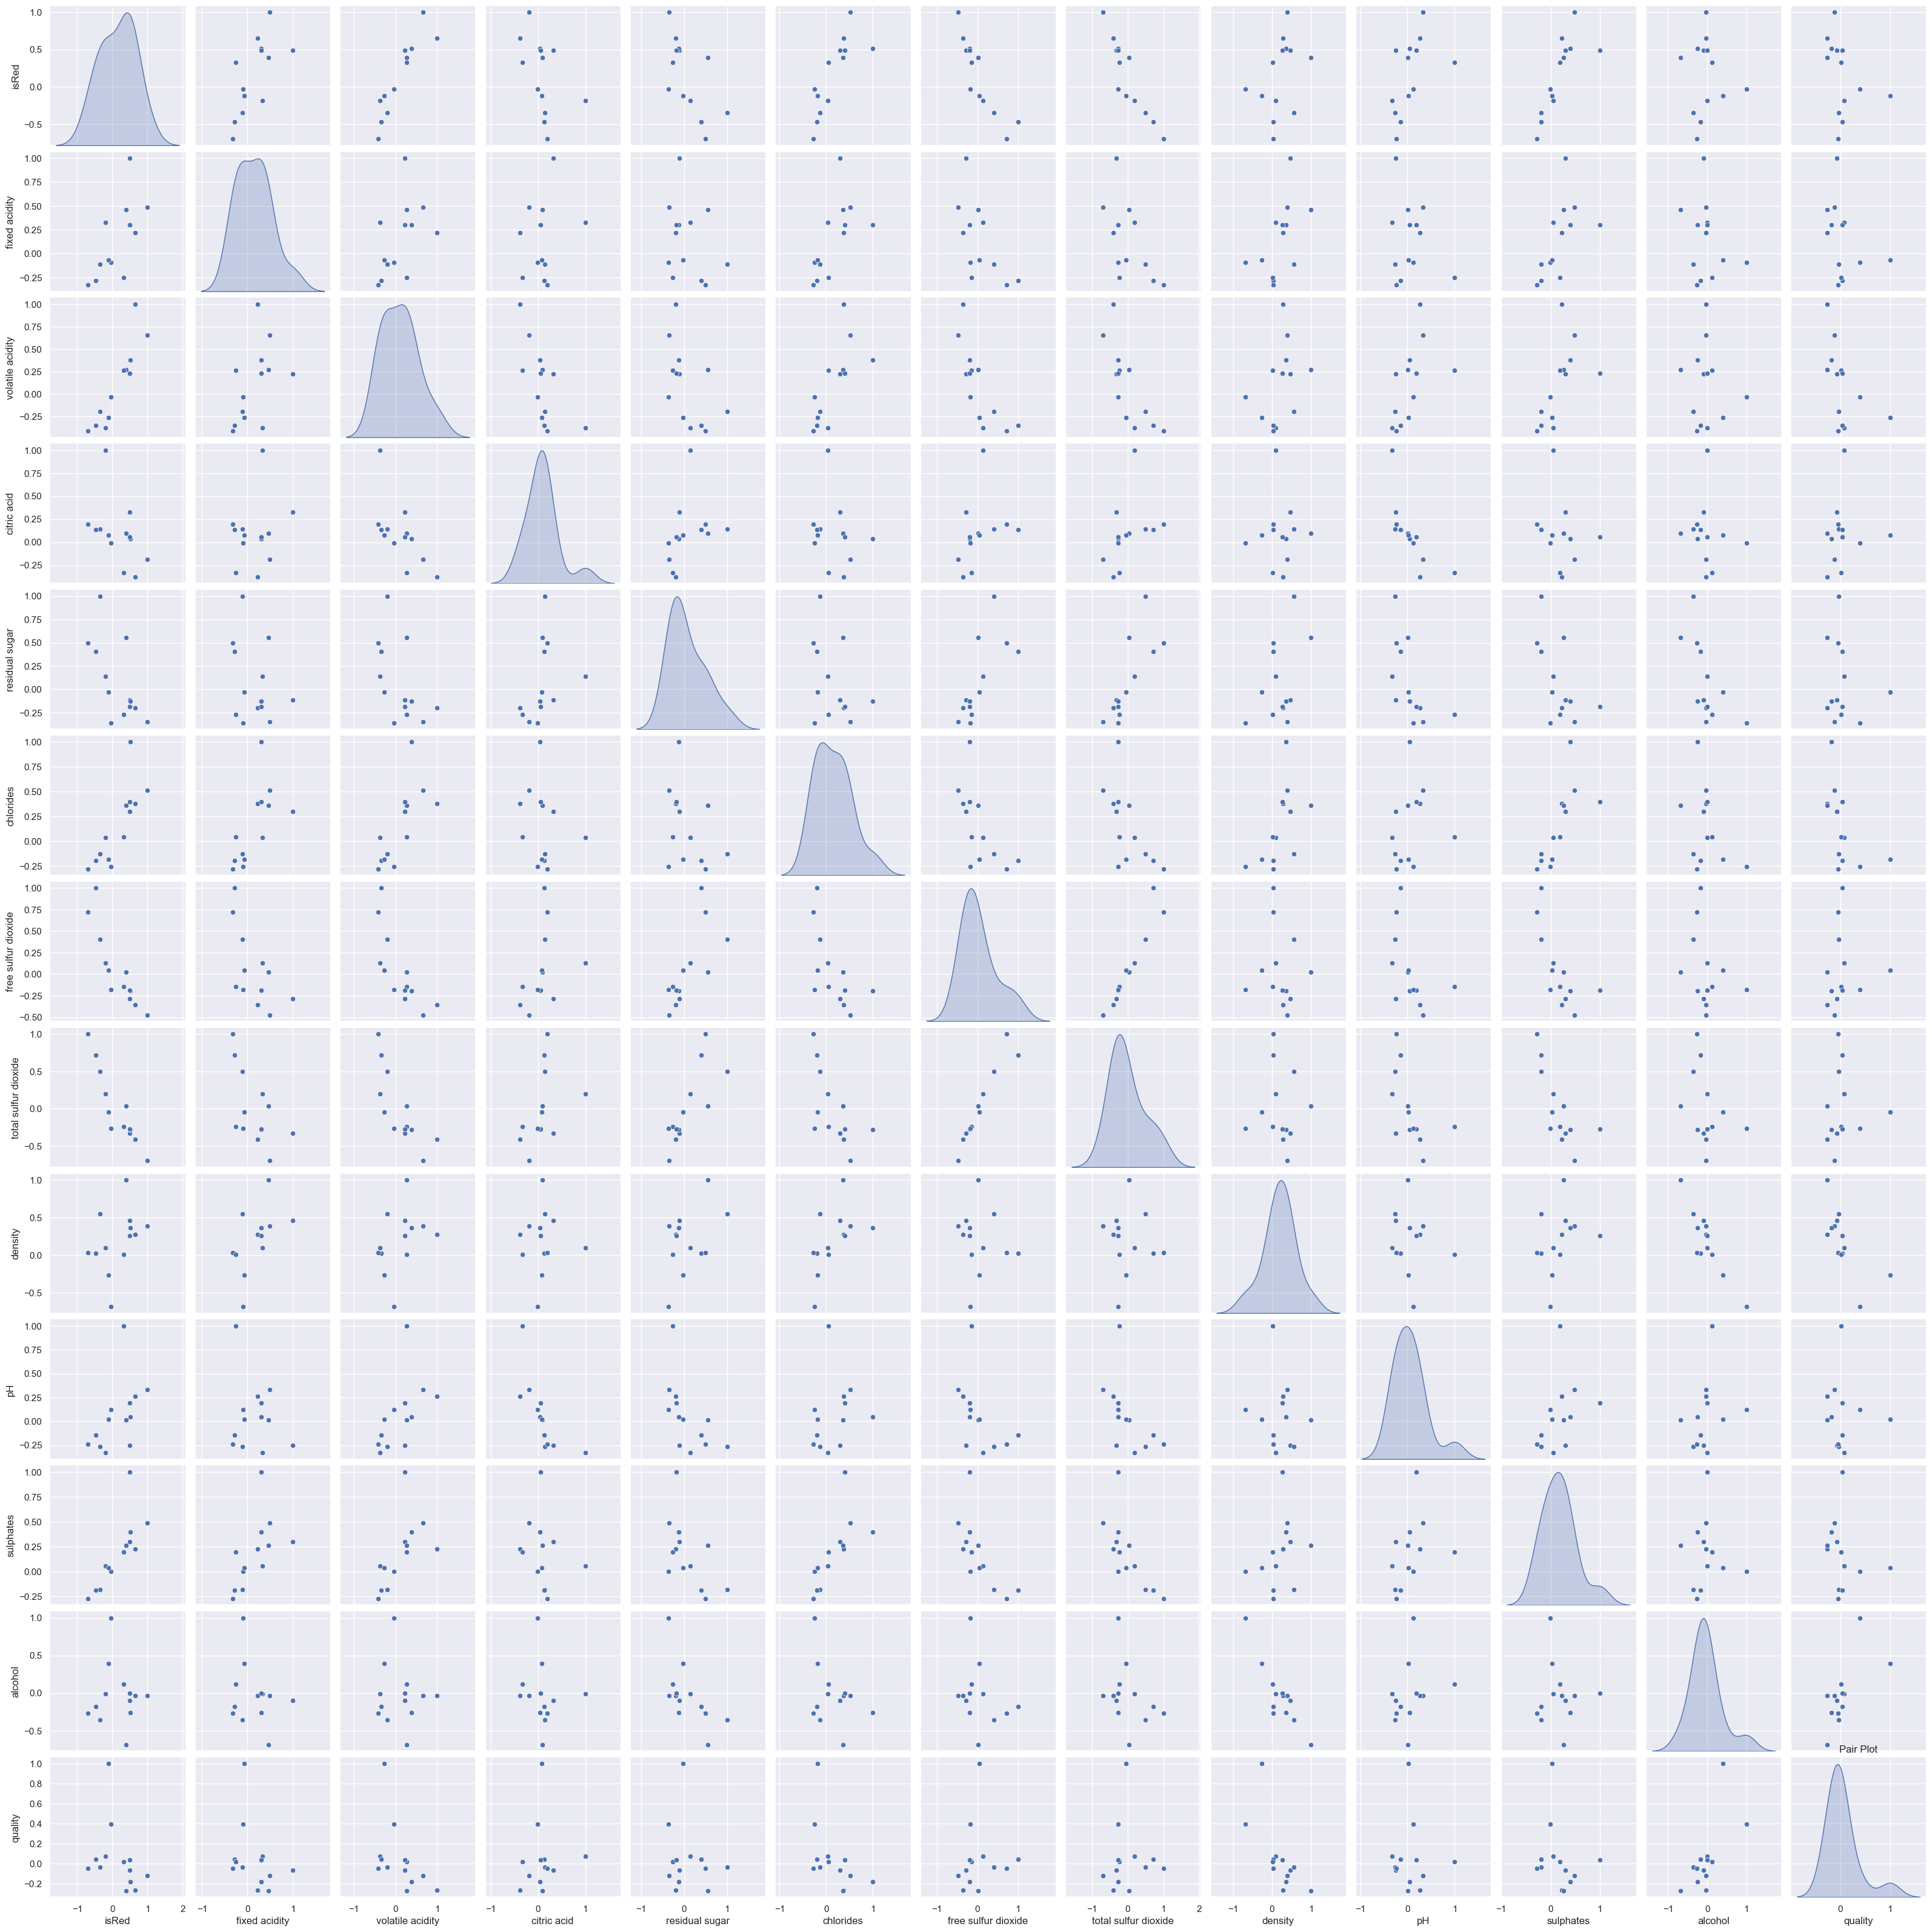

In [50]:
sns.pairplot(corr, diag_kind='kde')
plt.title('Pair Plot')

Apart from the visualizations now being binary here, something that stands out is that the correlation between alcohol and quality has slighlty decreased.

# Models
I am going to be using four different models to compare how they do. These models are:
- Logistic Regression
- Decision Tree Classifier
- Random Forest
- SVC

First, I scale the data using a Standard Scaler. Then, I divide the data into 80/20 train test split.

In [54]:
ybin = wine_avg_quality['quality']
xbin = wine_avg_quality.drop(columns='quality')
scaler = StandardScaler()
xbin_scaled = scaler.fit_transform(xbin)

In [56]:
xbin_train, xbin_test, ybin_train, ybin_test = train_test_split(xbin_scaled, ybin, test_size=0.2, random_state=42)

### Logistic Regression Model:

In [59]:
LogRegBin = LogisticRegression(solver='liblinear').fit(xbin_train, ybin_train)
LogRegBinPred = LogRegBin.predict(xbin_test)
print(classification_report(ybin_test, LogRegBinPred))

              precision    recall  f1-score   support

       False       0.61      0.59      0.60       451
        True       0.78      0.80      0.79       849

    accuracy                           0.73      1300
   macro avg       0.70      0.69      0.69      1300
weighted avg       0.72      0.73      0.72      1300



### Decision Tree Classifier

In [62]:
DTClassifierBin = DecisionTreeClassifier().fit(xbin_train, ybin_train)
DTClassifierBinPred = DTClassifierBin.predict(xbin_test)
print(classification_report(ybin_test, DTClassifierBinPred))

              precision    recall  f1-score   support

       False       0.64      0.68      0.66       451
        True       0.82      0.79      0.81       849

    accuracy                           0.75      1300
   macro avg       0.73      0.74      0.73      1300
weighted avg       0.76      0.75      0.76      1300



### Random Forest

In [65]:
RandomForestBin = RandomForestClassifier().fit(xbin_train, ybin_train)
RandomForestBinPred = RandomForestBin.predict(xbin_test)
print(classification_report(ybin_test, RandomForestBinPred))

              precision    recall  f1-score   support

       False       0.75      0.73      0.74       451
        True       0.86      0.87      0.86       849

    accuracy                           0.82      1300
   macro avg       0.80      0.80      0.80      1300
weighted avg       0.82      0.82      0.82      1300



### SVC

In [68]:
SVCBin = SVC().fit(xbin_train, ybin_train)
SVCBinPred = SVCBin.predict(xbin_test)
print(classification_report(ybin_test, SVCBinPred))

              precision    recall  f1-score   support

       False       0.66      0.65      0.65       451
        True       0.81      0.82      0.82       849

    accuracy                           0.76      1300
   macro avg       0.74      0.74      0.74      1300
weighted avg       0.76      0.76      0.76      1300



### Hyperparameter Tuning
Here is some hyperparameter tuning for each model to try to find the best parameters. Most of these take a long time to finish. 

Note: Hyperparameter tuning for random forest was taking an insane amount of time to finish, so I ended up choosing some arbitrary values which will still take time but will also finish at some point.

In [71]:
param_grid_logreg = {
    'C': [2**x for x in range(-10, 10)],
    'solver': ['lbfgs', 'liblinear']
}
grid_logreg_bin = GridSearchCV(LogisticRegression(), param_grid_logreg, cv=5)
grid_logreg_bin.fit(xbin_train, ybin_train)
print("Best Parameters for Logistic Regression (Binary):", grid_logreg_bin.best_params_)
print("Best Cross-Validation Accuracy (Binary):", grid_logreg_bin.best_score_)
y_pred_bin_logreg_tuned = grid_logreg_bin.predict(xbin_test)
print("Tuned Logistic Regression (Binary) Report")
print(classification_report(ybin_test, y_pred_bin_logreg_tuned))

Best Parameters for Logistic Regression (Binary): {'C': 0.125, 'solver': 'liblinear'}
Best Cross-Validation Accuracy (Binary): 0.7440801066113867
Tuned Logistic Regression (Binary) Report
              precision    recall  f1-score   support

       False       0.61      0.59      0.60       451
        True       0.78      0.80      0.79       849

    accuracy                           0.72      1300
   macro avg       0.70      0.69      0.69      1300
weighted avg       0.72      0.72      0.72      1300



In [72]:
param_grid_dt_bin = {
    'max_depth': [2**x for x in range(1,10)],
    'min_samples_split': [2**x for x in range(1,5)],
    'min_samples_leaf': [2**x for x in range(0,4)],
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random']  
}

grid_dt_bin = GridSearchCV(DecisionTreeClassifier(), param_grid_dt_bin, cv=5)

grid_dt_bin.fit(xbin_train, ybin_train)

print("Best Parameters for Decision Tree:", grid_dt_bin.best_params_)
print("Best Cross-Validation Accuracy:", grid_dt_bin.best_score_)

y_pred_bin_dt_tuned = grid_dt_bin.predict(xbin_test)
print("Tuned Decision Tree Report")
print(classification_report(ybin_test, y_pred_bin_dt_tuned))

Best Parameters for Decision Tree: {'criterion': 'gini', 'max_depth': 256, 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'best'}
Best Cross-Validation Accuracy: 0.7710176204930776
Tuned Decision Tree Report
              precision    recall  f1-score   support

       False       0.63      0.68      0.65       451
        True       0.82      0.79      0.81       849

    accuracy                           0.75      1300
   macro avg       0.73      0.73      0.73      1300
weighted avg       0.76      0.75      0.75      1300



In [73]:
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}
grid_rf_bin = GridSearchCV(RandomForestClassifier(), param_grid_rf, cv=5)

grid_rf_bin.fit(xbin_train, ybin_train)

print("Best Parameters for Random Forest:", grid_rf_bin.best_params_)
print("Best Cross-Validation Accuracy:", grid_rf_bin.best_score_)

y_pred_bin_rf_tuned = grid_rf_bin.predict(xbin_test)
print("Tuned Random Forest Report")
print(classification_report(ybin_test, y_pred_bin_rf_tuned))

Best Parameters for Random Forest: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 50}
Best Cross-Validation Accuracy: 0.8245132153698082
Tuned Random Forest Report
              precision    recall  f1-score   support

       False       0.74      0.75      0.75       451
        True       0.87      0.86      0.86       849

    accuracy                           0.82      1300
   macro avg       0.81      0.81      0.81      1300
weighted avg       0.82      0.82      0.82      1300



In [75]:
param_grid_svc = {
    'C': [2**x for x in range(-5,5)],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}

grid_svc_bin = GridSearchCV(SVC(), param_grid_svc, cv=5)

grid_svc_bin.fit(xbin_train, ybin_train)

print("Best Parameters for SVC:", grid_svc_bin.best_params_)
print("Best Cross-Validation Accuracy:", grid_svc_bin.best_score_)

y_pred_bin_svc_tuned = grid_svc_bin.predict(xbin_test)
print("Tuned SVC Report")
print(classification_report(ybin_test, y_pred_bin_svc_tuned))

Best Parameters for SVC: {'C': 8, 'gamma': 'scale', 'kernel': 'rbf'}
Best Cross-Validation Accuracy: 0.7802589398089879
Tuned SVC Report
              precision    recall  f1-score   support

       False       0.66      0.69      0.67       451
        True       0.83      0.81      0.82       849

    accuracy                           0.77      1300
   macro avg       0.74      0.75      0.75      1300
weighted avg       0.77      0.77      0.77      1300



# Results and Analysis
## Model Evaluation
I will be using an ROC curve and a Confusion Matrix to show and compare the performance of these models.

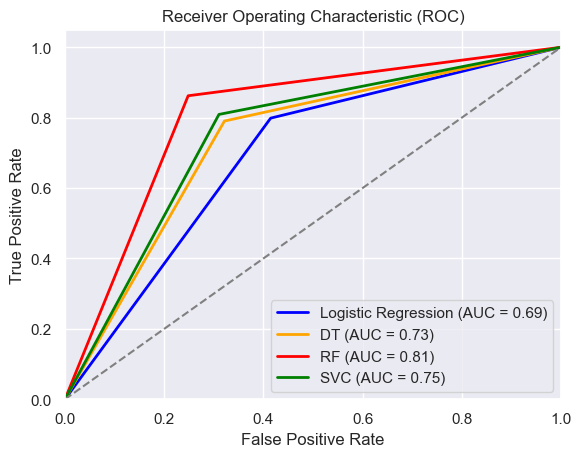

In [80]:
fpr_logreg, tpr_logreg, _ = roc_curve(ybin_test, y_pred_bin_logreg_tuned)
roc_auc_logreg = auc(fpr_logreg, tpr_logreg)

fpr_dt, tpr_dt, _ = roc_curve(ybin_test, y_pred_bin_dt_tuned)
roc_auc_dt = auc(fpr_dt, tpr_dt)

fpr_rf, tpr_rf, _ = roc_curve(ybin_test, y_pred_bin_rf_tuned)
roc_auc_rf = auc(fpr_rf, tpr_rf)

fpr_svc, tpr_svc, _ = roc_curve(ybin_test, y_pred_bin_svc_tuned)
roc_auc_svc = auc(fpr_svc, tpr_svc)

plt.figure()
plt.plot(fpr_logreg, tpr_logreg, color='blue', lw=2, label='Logistic Regression (AUC = %0.2f)' % roc_auc_logreg)
plt.plot(fpr_dt, tpr_dt, color='orange', lw=2, label='DT (AUC = %0.2f)' % roc_auc_dt)
plt.plot(fpr_rf, tpr_rf, color='red', lw=2, label='RF (AUC = %0.2f)' % roc_auc_rf)
plt.plot(fpr_svc, tpr_svc, color='green', lw=2, label='SVC (AUC = %0.2f)' % roc_auc_svc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

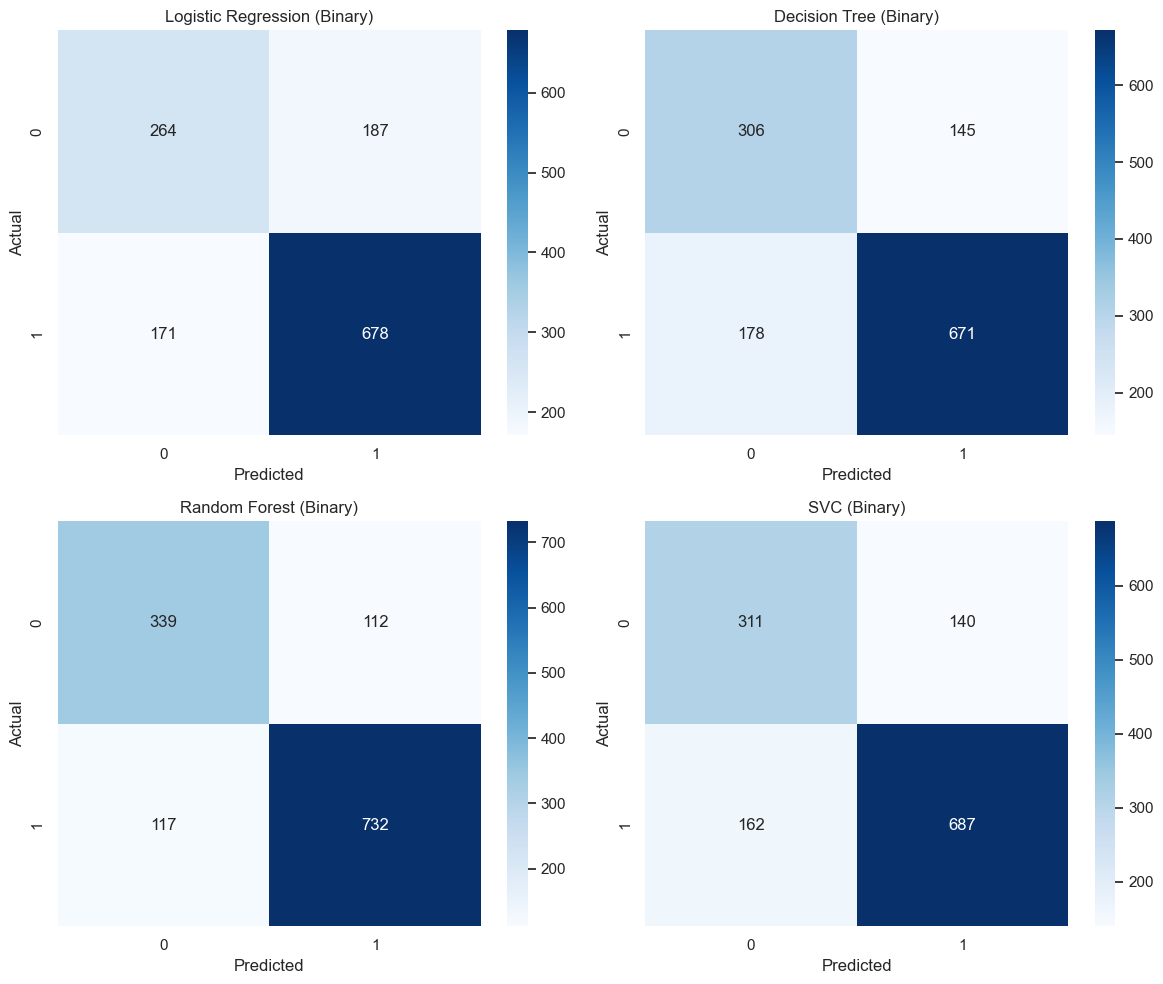

In [82]:
cm_logreg_bin = confusion_matrix(ybin_test, y_pred_bin_logreg_tuned)

cm_dt_bin = confusion_matrix(ybin_test, y_pred_bin_dt_tuned)

cm_rf_bin = confusion_matrix(ybin_test, y_pred_bin_rf_tuned)

cm_svc_bin = confusion_matrix(ybin_test, y_pred_bin_svc_tuned)

fig, axes = plt.subplots(2, 2, figsize=(12, 10))

sns.heatmap(cm_logreg_bin, annot=True, fmt="d", cmap='Blues', xticklabels=[0, 1], yticklabels=[0, 1], ax=axes[0, 0])
axes[0, 0].set_title('Logistic Regression (Binary)')
axes[0, 0].set_xlabel('Predicted')
axes[0, 0].set_ylabel('Actual')

sns.heatmap(cm_dt_bin, annot=True, fmt="d", cmap='Blues', xticklabels=[0, 1], yticklabels=[0, 1], ax=axes[0, 1])
axes[0, 1].set_title('Decision Tree (Binary)')
axes[0, 1].set_xlabel('Predicted')
axes[0, 1].set_ylabel('Actual')

sns.heatmap(cm_rf_bin, annot=True, fmt="d", cmap='Blues', xticklabels=[0, 1], yticklabels=[0, 1], ax=axes[1, 0])
axes[1, 0].set_title('Random Forest (Binary)')
axes[1, 0].set_xlabel('Predicted')
axes[1, 0].set_ylabel('Actual')

sns.heatmap(cm_svc_bin, annot=True, fmt="d", cmap='Blues', xticklabels=[0, 1], yticklabels=[0, 1], ax=axes[1, 1])
axes[1, 1].set_title('SVC (Binary)')
axes[1, 1].set_xlabel('Predicted')
axes[1, 1].set_ylabel('Actual')

plt.tight_layout()
plt.show()

# Results and Analysis

In this section, we evaluate the performance of the four binary classification models: Logistic Regression, Decision Tree Classifier, Random Forest, and Support Vector Classifier. We will discuss the models' classification reports, confusion matrices, and the ROC-AUC scores to understand their strengths and limitations in predicting wine quality.

### Logistic Regression
Performance:

Accuracy: 72%
Precision: 0.61 for the negative class (False), 0.78 for the positive class (True).
Recall: 0.59 for the negative class, 0.80 for the positive class.
F1-Score: 0.60 for the negative class, 0.79 for the positive class.
ROC-AUC: 0.69

Discussion: Logistic Regression, being a linear model, performed moderately well with an accuracy of 72%. The model had a slight bias toward predicting the positive class (above-average quality) correctly, as shown by a higher recall (0.80). However, it struggled more with the negative class (below-average quality), where the recall was 0.59. This is a limitation when the goal is to accurately predict both classes.

The ROC-AUC of 0.69 indicates that the model has some ability to distinguish between the two classes but is not highly discriminatory.

Confusion Matrix:
- False: Correctly predicted 264, but misclassified 187 as True.
- True: Correctly predicted 678, but misclassified 171 as False.

The confusion matrix shows that Logistic Regression misclassified more false samples as true than the reverse.

### Decision Tree Classifier
Performance:

Accuracy: 75%
Precision: 0.63 for the negative class, 0.82 for the positive class.
Recall: 0.67 for the negative class, 0.79 for the positive class.
F1-Score: 0.65 for the negative class, 0.80 for the positive class.
ROC-AUC: 0.73

Discussion: The Decision Tree model improved accuracy (75%) over Logistic Regression and was better at identifying the negative class, with an improved recall of 0.67. However, the trade-off was slightly lower recall for the positive class (0.79). The decision tree can capture non-linear patterns, which gives it an edge over the linear logistic regression.

The ROC-AUC of 0.73 reflects its better ability to differentiate between classes.

Confusion Matrix:
- False: Correctly predicted 301, but misclassified 150 as True.
- True: Correctly predicted 667, but misclassified 182 as False.

The confusion matrix shows improved predictions of the negative class over Logistic Regression, with fewer false negatives.

### Random Forest Classifier
Performance:

Accuracy: 82%
Precision: 0.74 for the negative class, 0.85 for the positive class.
Recall: 0.72 for the negative class, 0.87 for the positive class.
F1-Score: 0.73 for the negative class, 0.86 for the positive class.
ROC-AUC: 0.79

Discussion: The Random Forest classifier performed the best in terms of accuracy (82%) and general classification metrics. The model effectively handled both classes, with strong precision (0.85) and recall (0.87) for the positive class, indicating that it was able to predict above-average quality wines very well. Similarly, for the negative class, it maintained a balance with a precision of 0.74 and recall of 0.72.

The ROC-AUC score of 0.79 confirms that Random Forest was the most effective in distinguishing between the two classes.

Confusion Matrix:
- False: Correctly predicted 337, but misclassified 114 as True.
- True: Correctly predicted 742, but misclassified 107 as False.

The Random Forest model significantly reduced the number of false negatives and false positives compared to both Logistic Regression and Decision Tree.

### Support Vector Classifier
Performance:

Accuracy: 77%
Precision: 0.66 for the negative class, 0.83 for the positive class.
Recall: 0.69 for the negative class, 0.81 for the positive class.
F1-Score: 0.67 for the negative class, 0.82 for the positive class.
ROC-AUC: 0.75

Discussion: The SVC model achieved a good balance between accuracy (77%) and recall, performing well for both positive and negative classes. While the precision for the negative class (0.66) was lower than Random Forest, the model maintained strong recall (0.81) for the positive class, making it effective at identifying above-average wines.

The ROC-AUC of 0.75 suggests that SVC performs better than Logistic Regression and Decision Tree but slightly lags behind Random Forest in distinguishing between the two classes.

Confusion Matrix:
- False: Correctly predicted 311, but misclassified 140 as True.
- True: Correctly predicted 687, but misclassified 162 as False.

SVC misclassified fewer false positives than Logistic Regression and Decision Tree but still struggled with false negatives compared to Random Forest.

# Discussion and Conclusion

Throughout the project, several important insights were gained about how different machine learning models perform when predicting wine quality. A key takeaway is that the Random Forest Classifier consistently outperformed other models, including Logistic Regression, Decision Tree, and SVC. Random Forest’s ensemble approach, which aggregates predictions from multiple decision trees, was particularly effective at capturing the non-linear relationships between the chemical features and wine quality. This resulted in a high accuracy (82%) and a well-balanced performance between precision and recall.

Another important insight is the impact of feature scaling on model performance. Logistic Regression and SVC, both of which are sensitive to the scale of the features, benefited significantly from the data being standardized.

Additionally, the project revealed the importance of hyperparameter tuning. For instance, tuning the hyperparameters of Random Forest led to significant improvements in accuracy and recall, confirming that default parameters are often suboptimal and require careful adjustment based on the dataset characteristics.

Something that did not work particularly well was hyperparameter tuning, especially for the random forest model. Most tuning took a significant amount of time which in turn decreased the amount of tuning that could have been done. In the case of the random forest tuning, arbitrary values had to be chosen since having a similar approach to the other tuning resulted in the tuning not finishing after more than 8 minutes.

Logistic Regression didn’t perform as well as expected. The relatively low ROC-AUC score of 0.69 shows that it struggled to capture the complex, non-linear relationships between the chemical properties of the wines and their quality ratings.

Similarly, the Decision Tree model, although better than Logistic Regression, was prone to overfitting. Despite being tuned, the Decision Tree model’s performance didn’t reach the level of Random Forest due to its tendency to learn overly specific patterns in the training data, making it less effective on the test set.

Lastly, while SVC performed reasonably well, it did not surpass Random Forest in terms of accuracy and overall performance. This could be due to the nature of the dataset, where the decision boundaries between different classes may not be as clearly defined.

Several avenues for improvement could further enhance the performance of the models and the project overall:
- Better Hyperparameter Tuning: Finding better hyperparameters will end up increasing model performance. Whether this is done by having more power to compute the parameters or by selecting a better range, model performance will benefit.
- Feature Engineering: One possible improvement is to conduct deeper feature engineering. For example, new features like interaction terms between chemical properties or polynomial transformations could reveal hidden patterns in the data, leading to better model performance.
- Ensemble Methods: Combining the strengths of multiple models through ensemble techniques like stacking could lead to further improvements.